## Imports

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
import sys
sys.path.append('..')
from src.image_utils import *

def get_tree(basefolder, ws, filename, delin=''):
    tree = np.load(f'{basefolder}{ws}m{delin}/{filename}')
    return tree

vmin = (0.133166, 0.128009, 0)
vmax = (13.0125, 10.3163, 7.1825)

# Training and validation data generation

Instead of doing random split for training and validation data, we split on tiling columns, using columns 19-22 as valiadtion set. This is done in order to prevent data leakage from training set to validation set, especially in the case of 3D CNNs. 

We also use only non-interpolated and non-noisy spectral bands as our data.

# Reference methods

Reference methods use mean and standard deviation within segmented tree crown area for each band as their input. 

These data is then normalized to have zero-mean and unit variance for each spectral channel.

# 3D CNNs

We used image patch -based classification with our CNNs. We extracted square patches centered around the detected treetop with various diameters (4m, 6m, 8m and 10m), with the true label being the corresponding treetop. 

In the case a tree is located near the edge such that it's not possible to extract square image patch, then that tree was discarded from training and validation process. However, when we classified the full area, these situations were handled by mirroring the input values in order to get square patches. 

Examples of different sized patches are presented here:

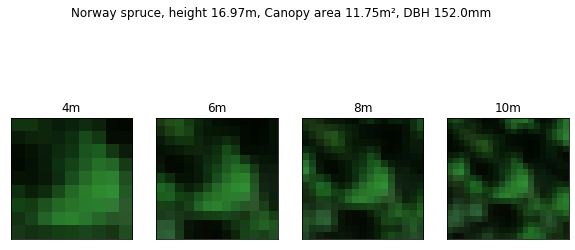

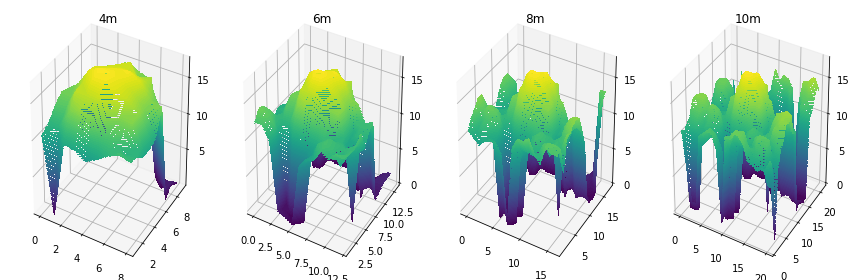

In [5]:
tree_id = np.random.randint(2800)
field_plots = gpd.read_file('../data/tree_cubes_10m_odd/5m/matched_trees.shp')
images = [get_tree('../data/tree_cubes_10m_odd/', ws, field_plots.iloc[tree_id].filename) for ws in range(2,6)]

titles = ['4m', '6m', '8m', '10m']
fig, axs = plt.subplots(1,4,figsize=(10,5))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(scale_image(images[i], channels=(82,49,28), vmin=vmin, vmax=vmax))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(titles[i])
plt.suptitle(f'{field_plots.iloc[tree_id].species}, height {field_plots.iloc[tree_id].Height_m}m, Canopy area {field_plots.iloc[tree_id].CA_m2}m², DBH {field_plots.iloc[tree_id].dbh}mm')
fig = plt.figure(figsize=(12,4))
axs = [fig.add_subplot(1,4,i, projection='3d') for i in range(1,5)]
for i, ax in enumerate(axs):
    plot_chm_contour(images[i][-1], ax)
    ax.set_title(titles[i])
fig.tight_layout()
